In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

#  loading data and previewing rows 

data= pd.read_csv('covid 19 dataset.csv')
print(data.head())

         date      continent location  total_cases  new_cases  total_deaths  \
0  11/19/2021           Asia    India      6423388       2490        107051   
1   9/12/2021  North America   Russia      6550634       6980        481184   
2   4/20/2020         Europe   Canada      4304572       9134         15116   
3  10/16/2022           Asia  Germany      2234489       7661         20045   
4   5/15/2021         Europe      USA      9958614       1724        419543   

   new_deaths  total_tests  new_tests  positive_rate  ...  stringency_index  \
0         323     60016385       7386       0.904377  ...         69.259331   
1         697     28666409       6862       0.525850  ...          7.185287   
2         325     80352550      40108       0.791575  ...         14.823246   
3         624     89212990      91788       0.115291  ...         70.007502   
4         824      5364240      75023       0.927643  ...         28.972334   

   population  population_density  median_age  age

In [3]:
# Checking columns

print(data.columns)

Index(['date', 'continent', 'location', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_tests', 'new_tests',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp_patients',
       'icu_patients', 'reproduction_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence'],
      dtype='object')


Identifying missing values

In [5]:
print(data.isnull().sum())

date                       0
continent                  0
location                   0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
total_tests                0
new_tests                  0
positive_rate              0
tests_per_case             0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
hosp_patients              0
icu_patients               0
reproduction_rate          0
stringency_index           0
population                 0
population_density         0
median_age                 0
aged_65_older              0
aged_70_older              0
gdp_per_capita             0
extreme_poverty            0
cardiovasc_death_rate      0
diabetes_prevalence        0
dtype: int64


Filtering countries of interest

In [13]:
countries_of_interest = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom', 'France', 'Italy', 'Spain', 'Germany', 'Turkey']
filtered_data = data[data['location'].isin(countries_of_interest)]
print(filtered_data)

            date      continent location  total_cases  new_cases  \
0     11/19/2021           Asia    India      6423388       2490   
1      9/12/2021  North America   Russia      6550634       6980   
3     10/16/2022           Asia  Germany      2234489       7661   
5      2/24/2022  North America  Germany      9524682       8182   
6      9/17/2022         Europe   France      7204212       2767   
...          ...            ...      ...          ...        ...   
2993   6/22/2020           Asia    India       125438         67   
2995   11/9/2022           Asia   France      7085904       1537   
2996   1/24/2020  North America    India      6699744        397   
2997    2/8/2021           Asia   France      9024327       5680   
2998    2/5/2020           Asia    India      2801445       9355   

      total_deaths  new_deaths  total_tests  new_tests  positive_rate  ...  \
0           107051         323     60016385       7386       0.904377  ...   
1           481184         

Summary statistics for numeric columns:


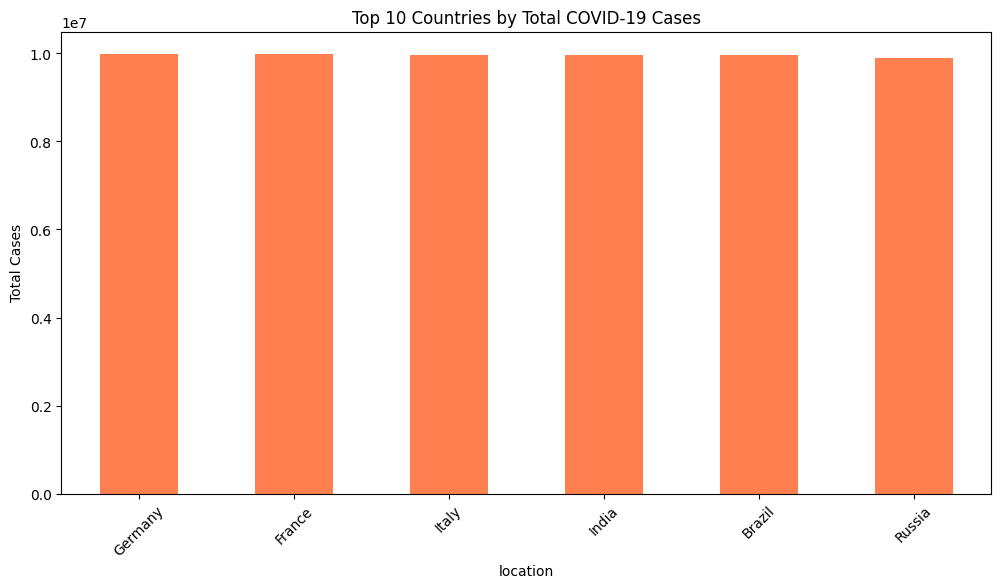

C:\Users\user\AppData\Local\Temp\ipykernel_13640\1766930727.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mortality_rate'] = filtered_data['total_deaths'] / filtered_data['total_cases']


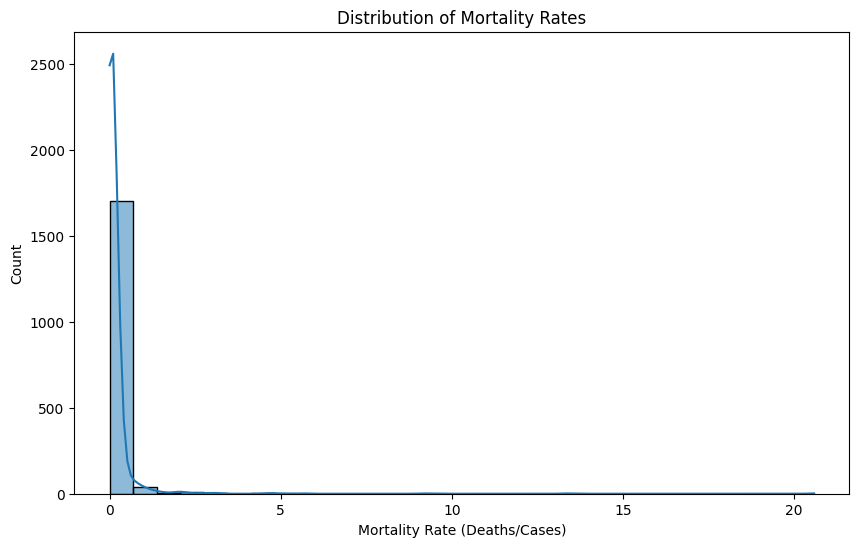

In [56]:
# 3. Exploratory Data Analysis (EDA)
# Summary statistics
print("Summary statistics for numeric columns:")
filtered_data.describe()

# Top 10 countries by total cases
top_countries = filtered_data.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

# Calculate mortality rate
filtered_data['mortality_rate'] = filtered_data['total_deaths'] / filtered_data['total_cases']

# Mortality rate distribution
plt.figure(figsize=(10,6))
sns.histplot(filtered_data['mortality_rate'].dropna(), bins=30, kde=True)
plt.title('Distribution of Mortality Rates')
plt.xlabel('Mortality Rate (Deaths/Cases)')
plt.show()

Total cases over time 


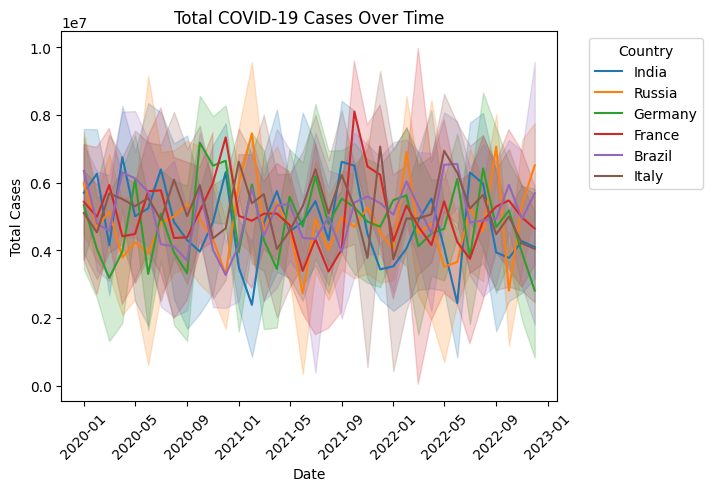

In [38]:
# Plot total cases over time
# Plot total cases over time




# plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

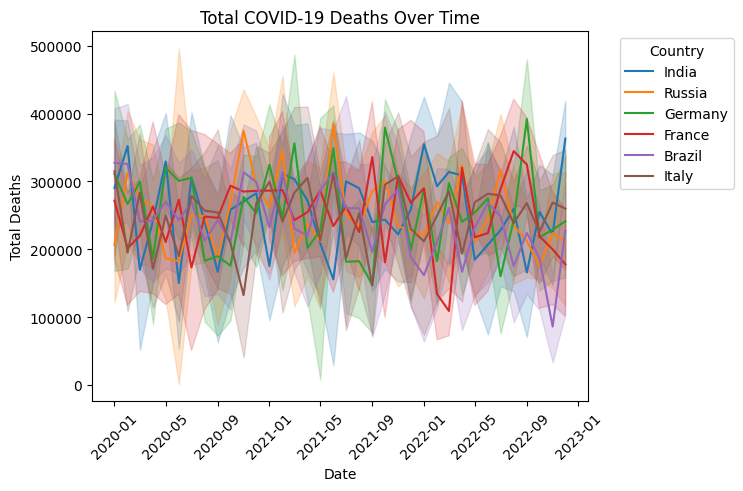

In [39]:
# plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [49]:
# Choropleth map of total cases (requires plotly)
import plotly.express as px

if 'plotly' in globals():
    latest_date = filtered_data['date'].max()
    latest_data = filtered_data[filtered_data['date'] == latest_date]
    
    fig = px.choropleth(latest_data, 
                        locations="location",
                        locationmode='country names',
                        color="total_cases",
                        hover_name="location",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title=f'Total COVID-19 Cases by Country as of {latest_date.date()}')
    fig.show()
else:
    print("Plotly not available. Install with: pip install plotly")

Plotly not available. Install with: pip install plotly


In [48]:
# 9 Exporting Results
# Save cleaned data to new CSV
filtered_data.to_csv('cleaned_covid_data.csv', index=False)

India had the steepest rise in total vaccinations starting from mid-2021.
The death rate appears to stabilize over time for the US and India, while others have a slower rise.
United States consistently had higher daily new cases compared to India